In [42]:
#Electricity Production
#This is a kaggle dataset
#It is a monthly dataset

#Getting the data
electric = read.csv('Electric_Production.csv' , header = T , stringsAsFactors = F)



In [43]:
#Inspecting the first few rows 
head(electric)[1:5,]

DATE,IPG2211A2N
1/1/1985,72.5052
2/1/1985,70.6720
3/1/1985,62.4502
4/1/1985,57.4714
5/1/1985,55.3151


In [44]:
#Getting a summary of the data 
summary(electric)

     DATE             IPG2211A2N    
 Length:397         Min.   : 55.32  
 Class :character   1st Qu.: 77.11  
 Mode  :character   Median : 89.78  
                    Mean   : 88.85  
                    3rd Qu.:100.52  
                    Max.   :129.40  

In [45]:
#creating a time series 
electric_ts = ts(electric$IPG2211A2N , start = 1985 , frequency = 12)

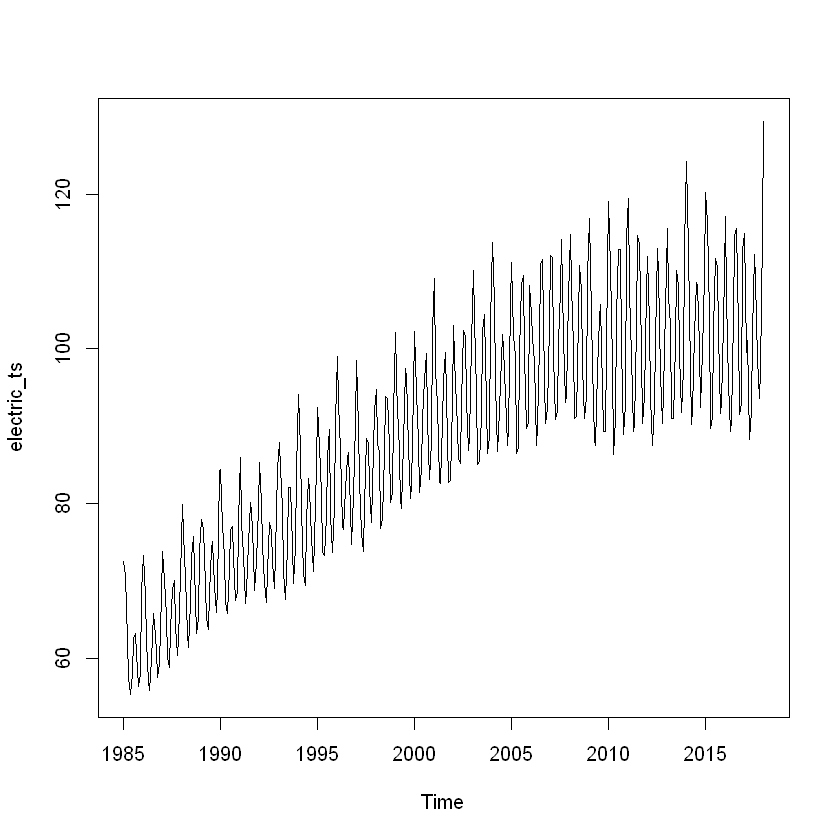

In [46]:
#Plotting the time series 
plot(electric_ts) #we see that there is a trend in the dataset

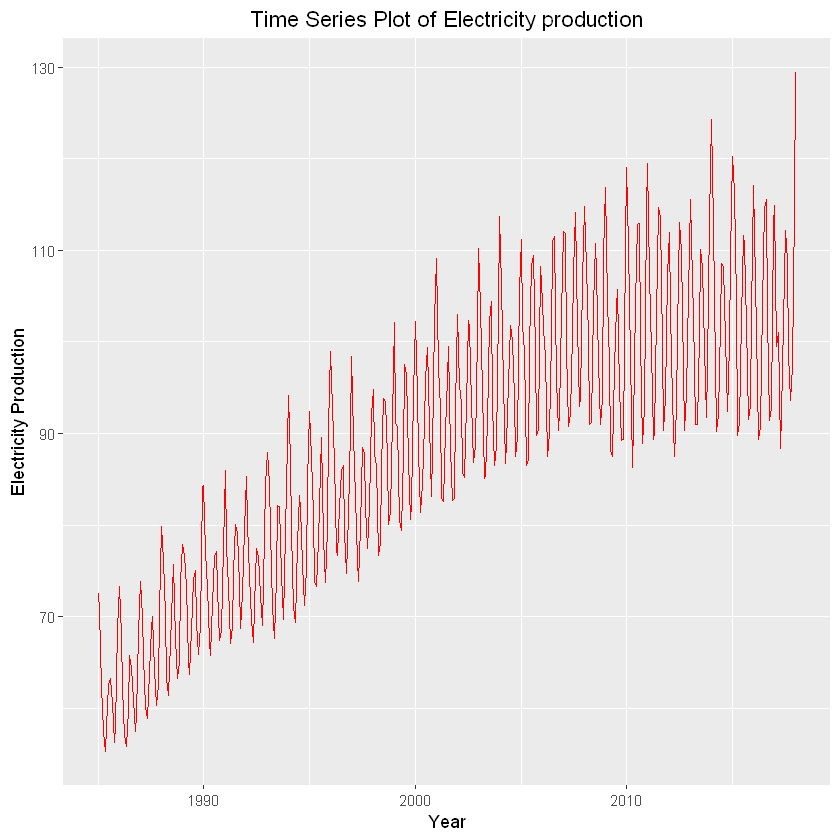

In [47]:
#Plotting using ggplot2
plot_ = autoplot(electric_ts , 
                 color = "red")+
  labs(x = "Year" , y = "Electricity Production" ,
               title = "Time Series Plot of Electricity production")+
  theme(plot.title = element_text(hjust = 0.5))
plot_

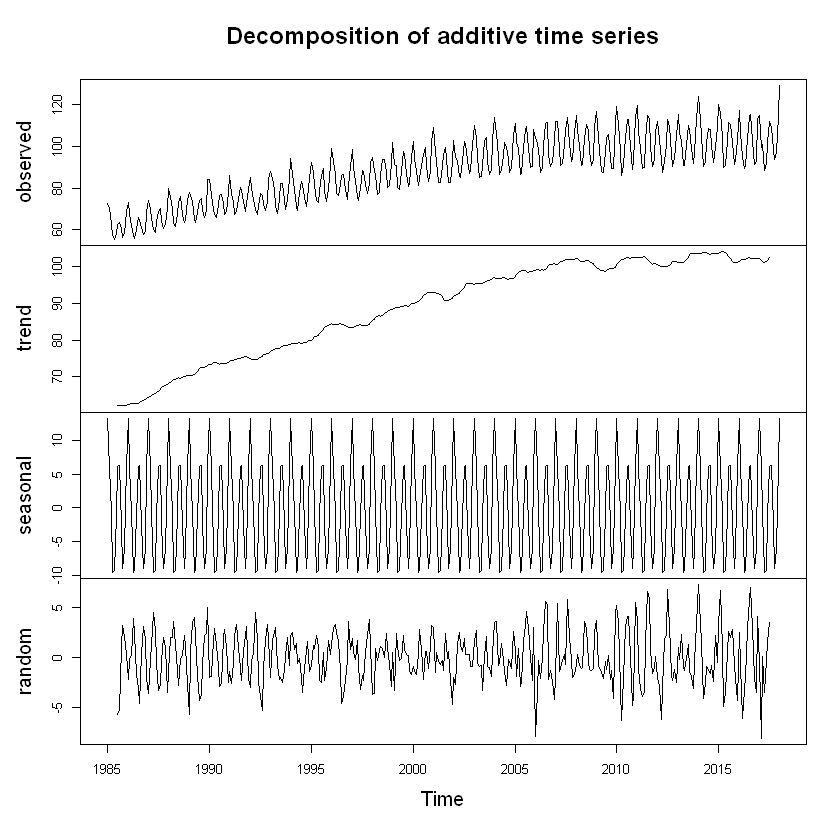

In [48]:
#Seasonal decomposition 

plot(decompose(electric_ts))

In [49]:
#once again the trend is very clear 
#seasonality is also present 

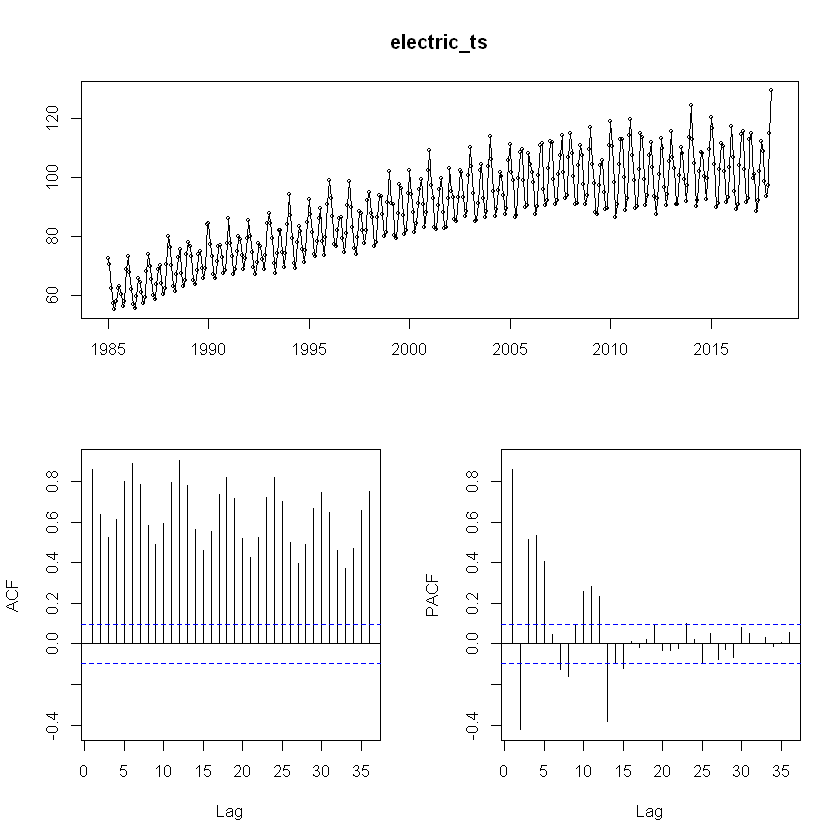

In [50]:
#ACF and pacf plots
tsdisplay(electric_ts)

In [25]:
#Model implementation 

#Exponential Smoothing method 
esmod = ets(electric_ts)
summary(esmod)
#we get a model with multiplicative error , additive trend and multiplicative seasonality

ETS(M,A,M) 

Call:
 ets(y = electric_ts) 

  Smoothing parameters:
    alpha = 0.4226 
    beta  = 6e-04 
    gamma = 0.1755 

  Initial states:
    l = 62.4801 
    b = 0.0931 
    s = 1.0831 0.9238 0.9017 0.9553 1.0402 1.036
           0.9751 0.9007 0.9278 1.0157 1.0883 1.1522

  sigma:  0.0263

     AIC     AICc      BIC 
3053.850 3055.465 3121.577 

Training set error measures:
                     ME     RMSE      MAE          MPE     MAPE      MASE
Training set 0.04313688 2.450764 1.862419 0.0004651161 2.035931 0.6525793
                  ACF1
Training set 0.2033935


In [26]:
#Forecasting the model
esforecast = forecast(esmod , h = 24) #forecasting


In [27]:
#Arima 
arimamod = auto.arima(electric_ts)
summary(arimamod)
arimaforecast = forecast(arimamod , h = 24)

Series: electric_ts 
ARIMA(2,1,1)(0,1,1)[12] 

Coefficients:
         ar1      ar2      ma1     sma1
      0.5503  -0.0683  -0.9477  -0.7635
s.e.  0.0544   0.0549   0.0193   0.0331

sigma^2 estimated as 5.838:  log likelihood=-888.05
AIC=1786.11   AICc=1786.27   BIC=1805.86

Training set error measures:
                     ME     RMSE      MAE        MPE     MAPE      MASE
Training set -0.1474299 2.363849 1.791855 -0.2115265 1.942956 0.6278541
                     ACF1
Training set -0.002715831


In [28]:
#Neural Networks 
nnmod = nnetar(electric_ts)
summary(nnmod)
nnforecast = forecast(nnmod , h = 24)

          Length Class        Mode     
x         397    ts           numeric  
m           1    -none-       numeric  
p           1    -none-       numeric  
P           1    -none-       numeric  
scalex      2    -none-       list     
size        1    -none-       numeric  
subset    397    -none-       numeric  
model      20    nnetarmodels list     
nnetargs    0    -none-       list     
fitted    397    ts           numeric  
residuals 397    ts           numeric  
lags        4    -none-       numeric  
series      1    -none-       character
method      1    -none-       character
call        2    -none-       call     

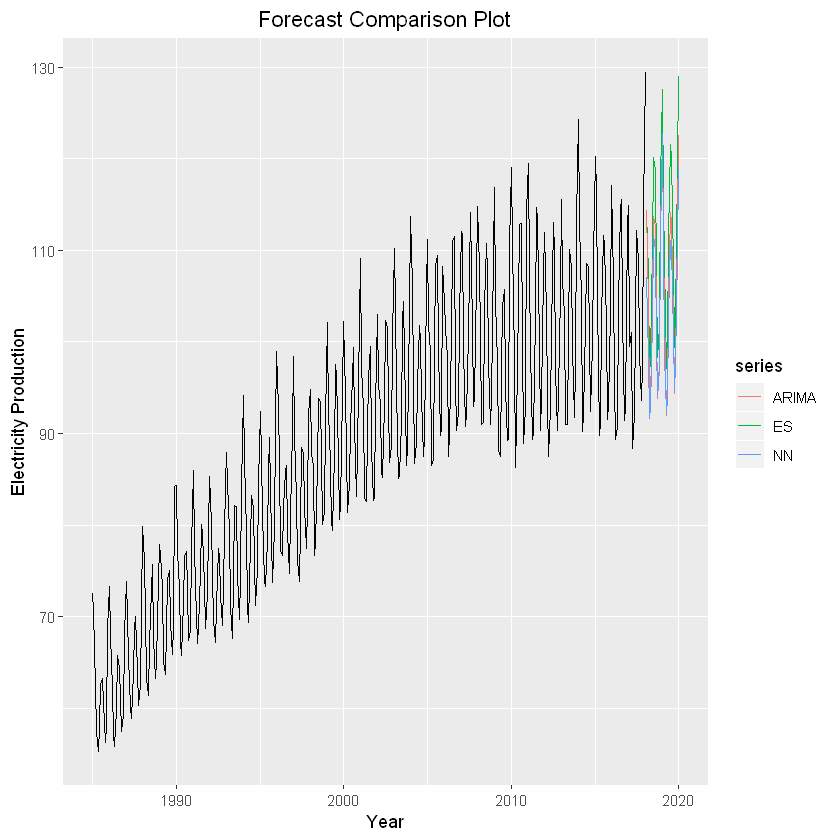

In [29]:
#Forecast Comparison plot 
fcplot = autoplot(electric_ts)+
  autolayer(esforecast$mean , series = "ES")+
  autolayer(arimaforecast$mean , series = "ARIMA")+
  autolayer(nnforecast$mean , series = "NN")+
  labs(x = "Year" , y = "Electricity Production" ,
       title = "Forecast Comparison Plot")+
  theme(plot.title = element_text(hjust = 0.5))
fcplot
#it is seen that all three models closely resemble each other 


In [36]:
#Forecast accuracy

es_rmse = sqrt(mean((electric_ts-esmod$fitted)^2))
arima_rmse = sqrt(mean((electric_ts-arimamod$fitted)^2))
nn_rmse = sqrt(mean((electric_ts-nnmod$fitted)^2 , na.rm = T))

print(paste('Exponential smooothing :',es_rmse))
print(paste('Arima model :',arima_rmse))
print(paste('Neural Network :',nn_rmse))



#Thus we see that the arima model has the lowest rmse



[1] "Exponential smooothing : 2.45076387946786"
[1] "Arima model : 2.36384870475943"
[1] "Neural Network : 2.8099249912073"


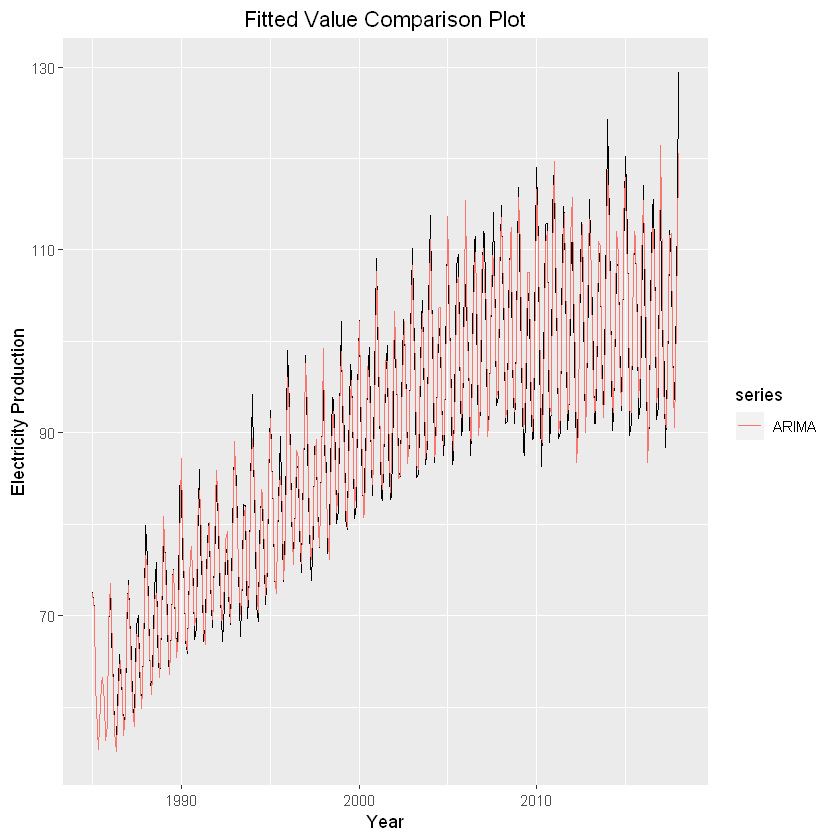

In [37]:
#Comparison of arima fitted values with the original time series
autoplot(electric_ts)+
  autolayer(arimamod$fitted , series = "ARIMA")+
  labs(x = "Year" , y = "Electricity Production" ,
       title = "Fitted Value Comparison Plot")+
  theme(plot.title = element_text(hjust = 0.5))


In [38]:
#Train_test accuracy 
#creating the train and test sets 
train = window(electric_ts , start = c(1985,1) , end =c (2009,12))
test = window(electric_ts , start = c(2010,1))

In [39]:
#Forecasting the models
es = forecast(ets(train) , 97)
arima_ = forecast(auto.arima(train) , 97)
nn = forecast(nnetar(train) , 97)

In [41]:
#Accuracy of the models 

print('Expoential Smoothing')
accuracy(es , test)
print('ARIMA')
accuracy(arima_,test)
print("Neural Networks")
accuracy(nn , test)



[1] "Expoential Smoothing"


,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1,Theil's U
Training set,0.1540473,2.076760,1.573616,0.1429671,1.828842,0.5719681,0.003898923,NA
Test set,1.5621007,4.035287,3.153450,1.3216412,2.974846,1.1461963,0.519219070,0.4043957


[1] "ARIMA"


,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1,Theil's U
Training set,-0.1144673,2.112082,1.585630,-0.1659028,1.812181,0.5763351,-0.003850053,NA
Test set,-1.3609559,3.809931,3.056618,-1.5155965,3.002353,1.1110005,0.492802734,0.3872334


[1] "Neural Networks"


,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1,Theil's U
Training set,-6.592282e-05,2.470947,1.913802,-0.08201528,2.197033,0.6956169,0.2299288,NA
Test set,2.338168e+00,5.559627,4.283766,1.95075993,4.033000,1.5570367,0.4118159,0.5643001
